#### Paquetes necesarios

In [45]:
import cv2
import matplotlib.pyplot as plt

#### Visualización de la imagen base

(986, 1749, 3)


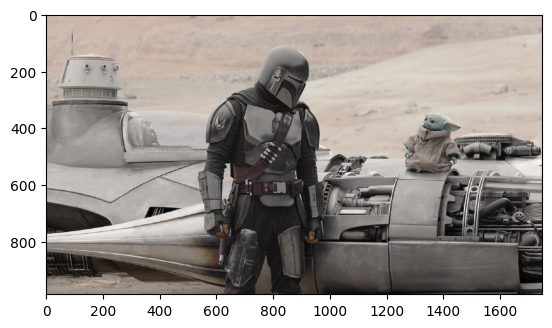

In [46]:
img = cv2.imread('Images/mandalorian.png') 

# Dimensiones
print(img.shape)

# Convierte la imagen a RGB y la muestra
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

#### Detección zonas claras/oscuras de la imagen

Verde = Píxel más claro
Rojo = Píxel más oscuro


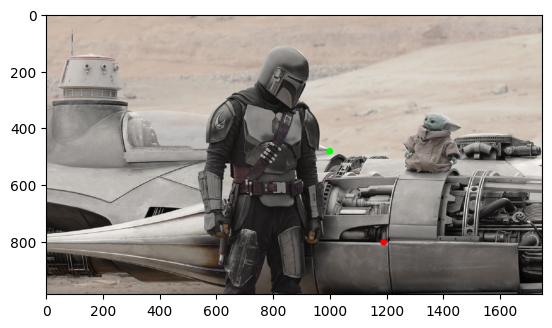

In [47]:
# Convierte la imagen a escala de grises
gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Obtiene las filas (componente Y) y columnas (componente X) de la imagen
rows, cols = gray_img.shape

# Variables para almacenar el brillo más claro y más oscuro y las coordenadas
min_brightness = float('inf')
max_brightness = -float('inf')
min_coords = (0, 0)
max_coords = (0, 0)

for x in range(0,cols):
    for y in range(0,rows):
        brightness = gray_img[y,x]
        if brightness < min_brightness:
            min_brightness = brightness
            min_coords = (x, y)
        if brightness > max_brightness:
            max_brightness = brightness
            max_coords = (x, y)

print("Verde = Píxel más claro")
print("Rojo = Píxel más oscuro")

# Dibuja círculos en las coordenadas de las regiones más clara y oscura
cv2.circle(img_rgb, max_coords, 12, (0, 255, 0), -1)  
cv2.circle(img_rgb, min_coords, 12, (255, 0, 0), -1)  

plt.imshow(img_rgb) 
plt.show()

#### Detección zonas claras/oscuras de la webcam

In [48]:
# Captura de video desde la cámara web
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    
    if ret:
        # Convierte la imagen a escala de grises
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Obtiene las filas (componente Y) y columnas (componente X) de la imagen
        rows, cols = gray_frame.shape
      
        # Variables para almacenar el brillo más claro y más oscuro y las coordenadas
        min_brightness = float('inf')
        max_brightness = -float('inf')
        min_coords = (0, 0)
        max_coords = (0, 0)

        for x in range(0,cols):
            for y in range(0,rows):
                brightness = gray_frame[y,x]
                if brightness < min_brightness:
                    min_brightness = brightness
                    min_coords = (x, y)
                if brightness > max_brightness:
                    max_brightness = brightness
                    max_coords = (x, y)
        
        # Dibuja círculos en las coordenadas de las regiones más clara y oscura
        cv2.circle(frame, min_coords, 4, (0, 0, 255), -1) 
        cv2.circle(frame, max_coords, 4, (0, 255, 0), -1) 
        
        cv2.imshow('Puntos claros y oscuros', frame)
    
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()